In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error as mse, r2_score
import matplotlib.pyplot as plt
import matplotlib as mpl
#matplotlib.use("Agg")
import seaborn as sns
from tabulate import tabulate


In [41]:
mpl.rcParams['figure.dpi'] = 600

#-----Import .MAT file into a dataframe--------
data = pd.read_csv(r"C:\Users\INBHV3\OneDrive - ABB\Desktop\Big Mart Sales Prediction\Inputs\train.csv")

data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [16]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [27]:
#Checking if any rows have null cells
data.isnull().sum()
# data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

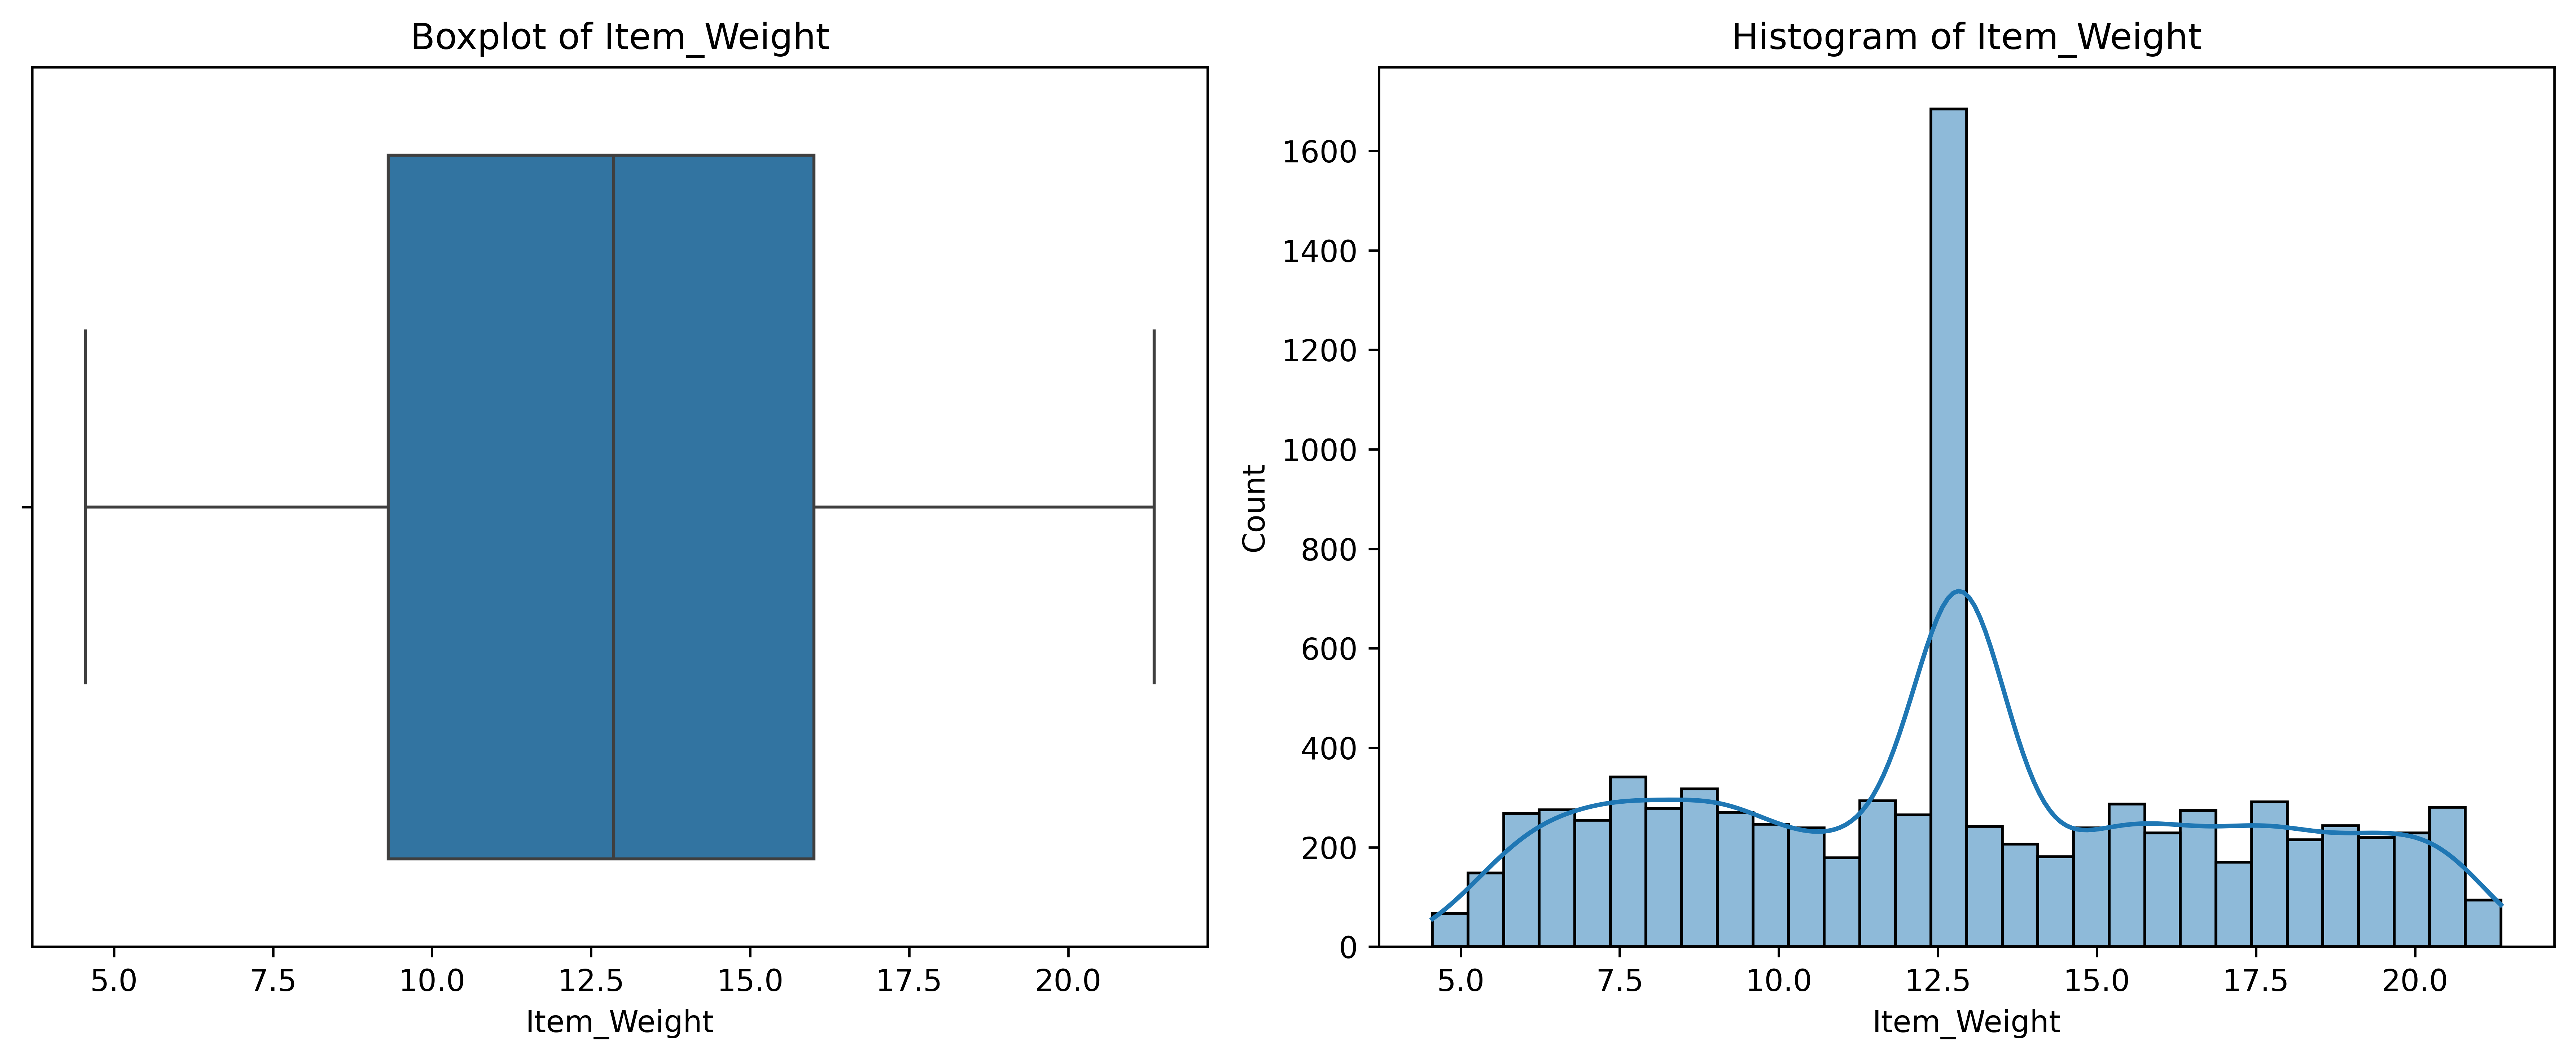

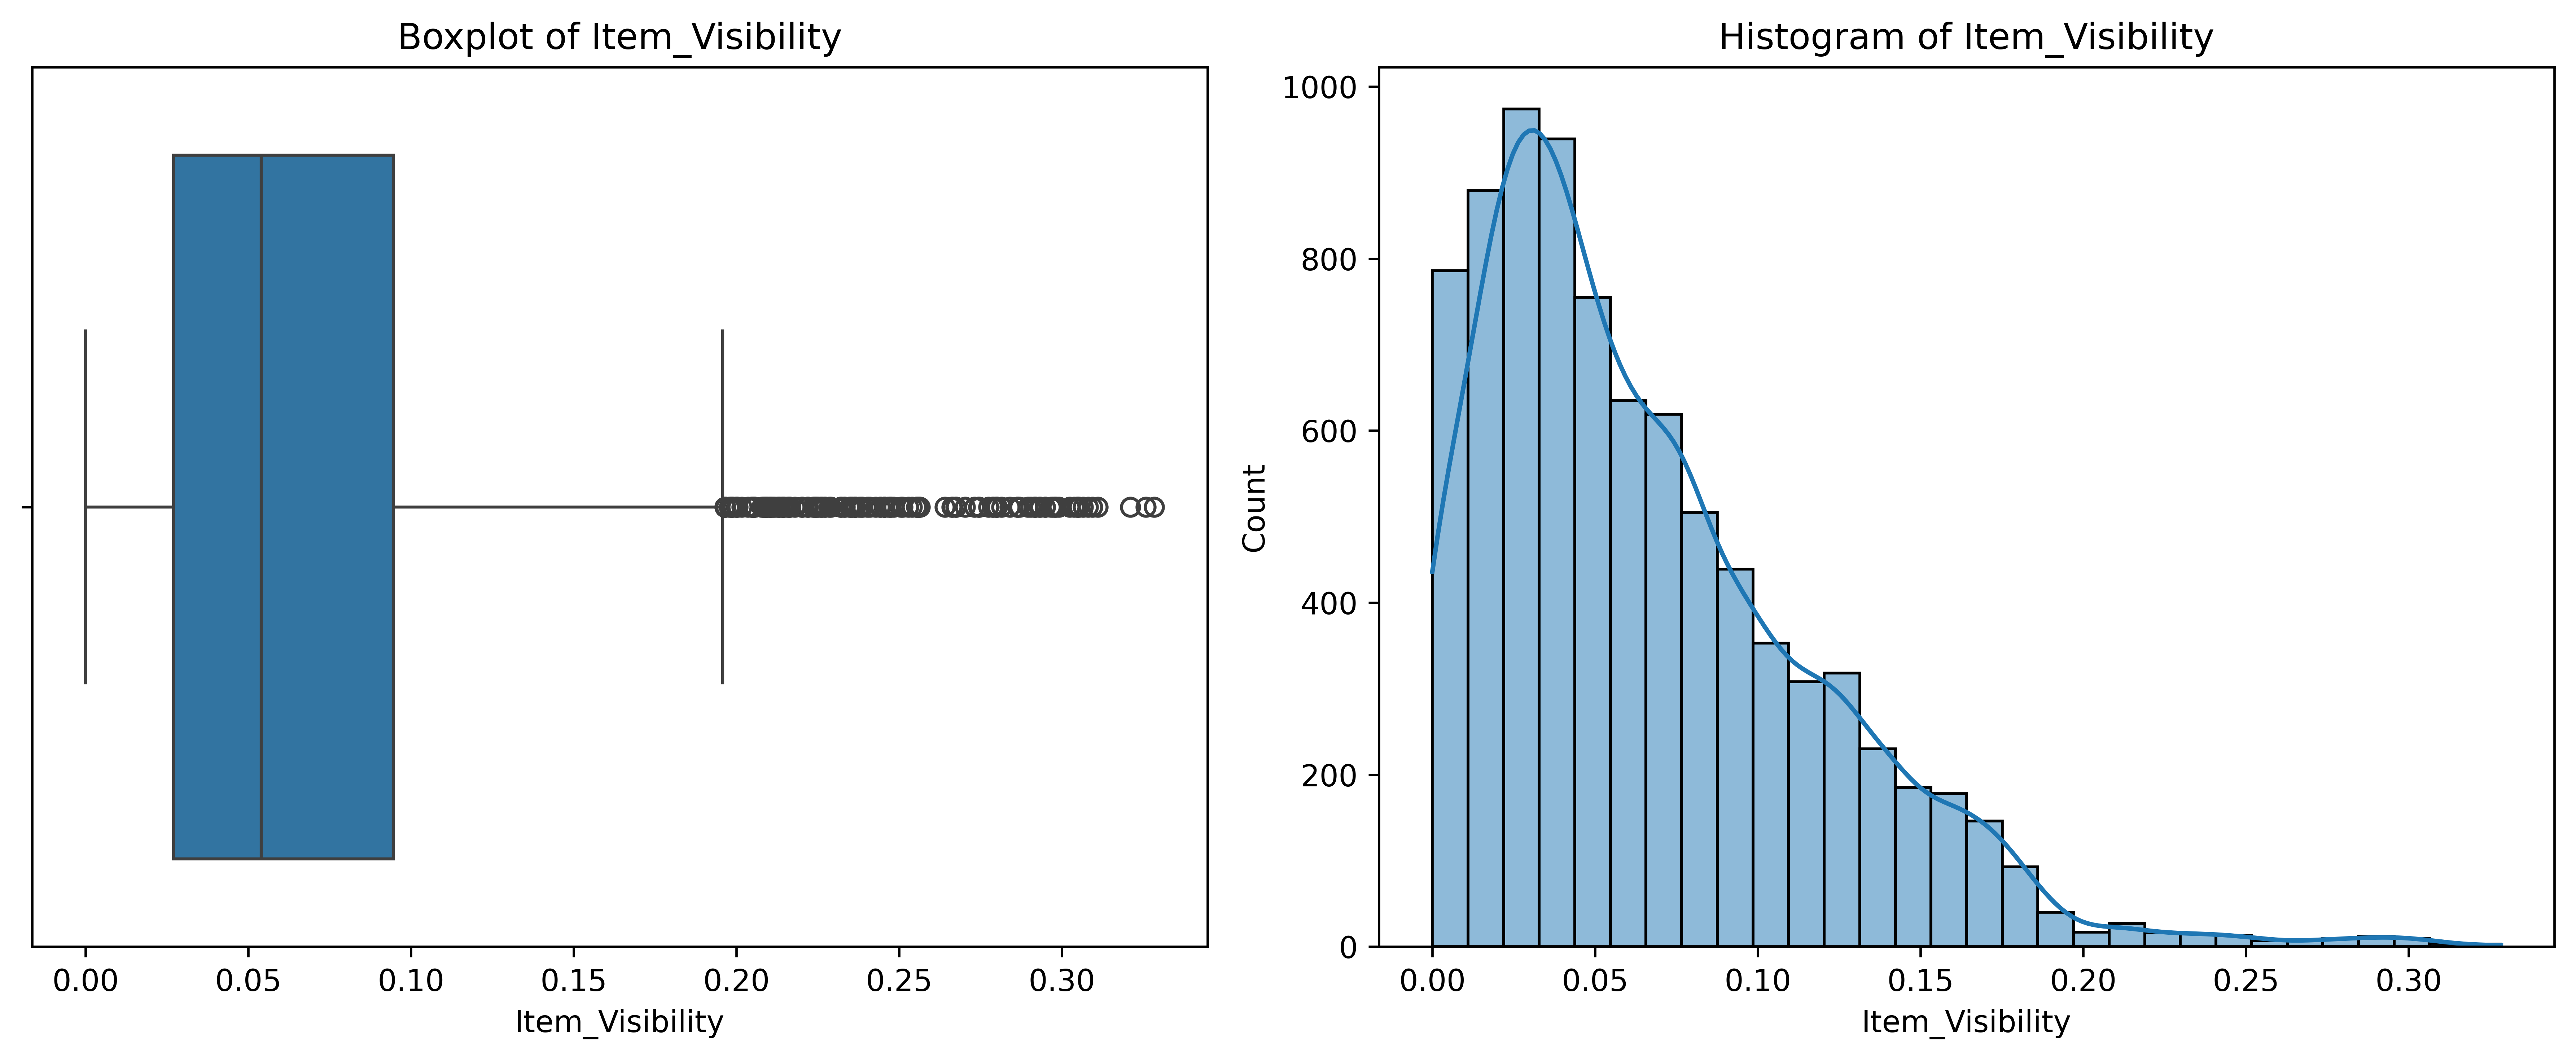

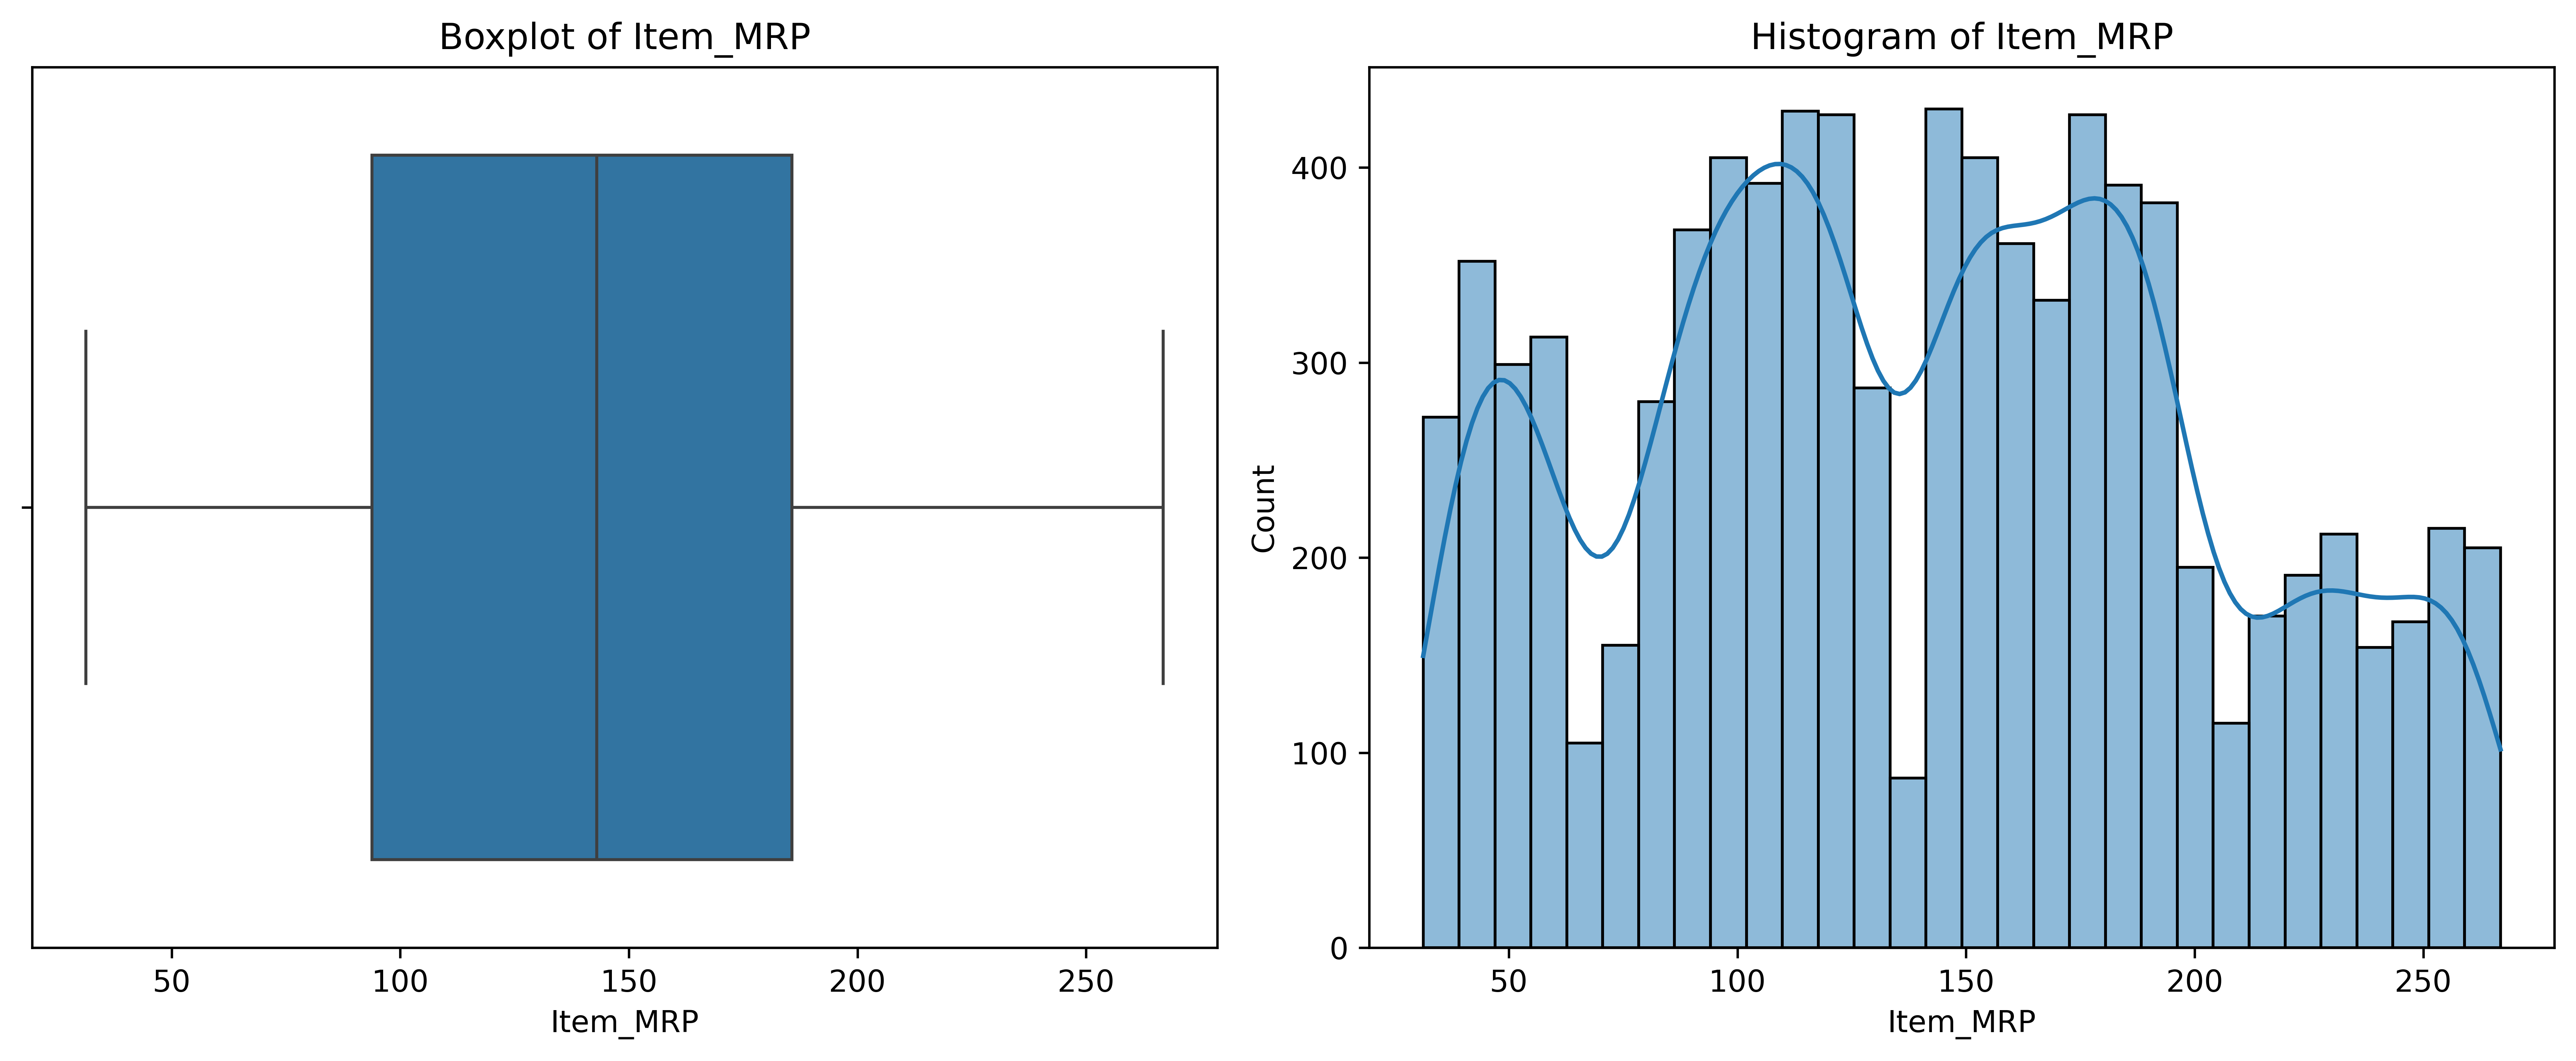

In [ ]:
features_to_inspect = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

for feature in features_to_inspect:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.subplot(1, 2, 2)
    sns.histplot(data[feature], bins=30, kde=True) #Kernel Density Estimate (KDE) curve shows the smoothed probability density of the data
    plt.title(f'Histogram of {feature}')
    plt.tight_layout()
    plt.show()

In [42]:
#Fill missing categorical values with mode
for col in ['Outlet_Size']:
    data[col] = data[col].fillna(data[col].mode()[0])

# Fill missing numeric values with mean
for col in ['Item_Weight']:
    data[col] = data[col].fillna(data[col].mean())

In [43]:
#Checking if any rows have null cells
data.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [44]:
# Standardize Item_Fat_Content values
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular',
    'Regular': 'Regular',
    'regular': 'Regular',
    'Low Fat': 'Low Fat',
    'Low fat': 'Low Fat'
})

In [45]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [47]:
# Label Encoding for high-cardinality categorical columns
le = LabelEncoder()
for col in ['Item_Identifier', 'Outlet_Identifier']:
    data[col] = le.fit_transform(data[col])

# data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [51]:
data['Item_Outlet_Sales'].describe()
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [52]:
data2 = data.copy()
data2['Item_Outlet_Sales'] = pd.to_numeric(data2['Item_Outlet_Sales'], errors='coerce')

In [54]:
# One-Hot Encoding for low-cardinality categorical columns
df = pd.get_dummies(data2, columns=[
    'Item_Fat_Content', 'Item_Type', 'Outlet_Size', 
    'Outlet_Location_Type', 'Outlet_Type'
], dtype=int)

In [58]:
df.head()
# df.columns

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.30,0.016047,249.8092,9,1999,3735.1380,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,8,5.92,0.019278,48.2692,3,2009,443.4228,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,662,17.50,0.016760,141.6180,9,1999,2097.2700,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,1121,19.20,0.000000,182.0950,0,1998,732.3800,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,1297,8.93,0.000000,53.8614,1,1987,994.7052,1,0,0,...,1,0,0,0,0,1,0,1,0,0


<Axes: >

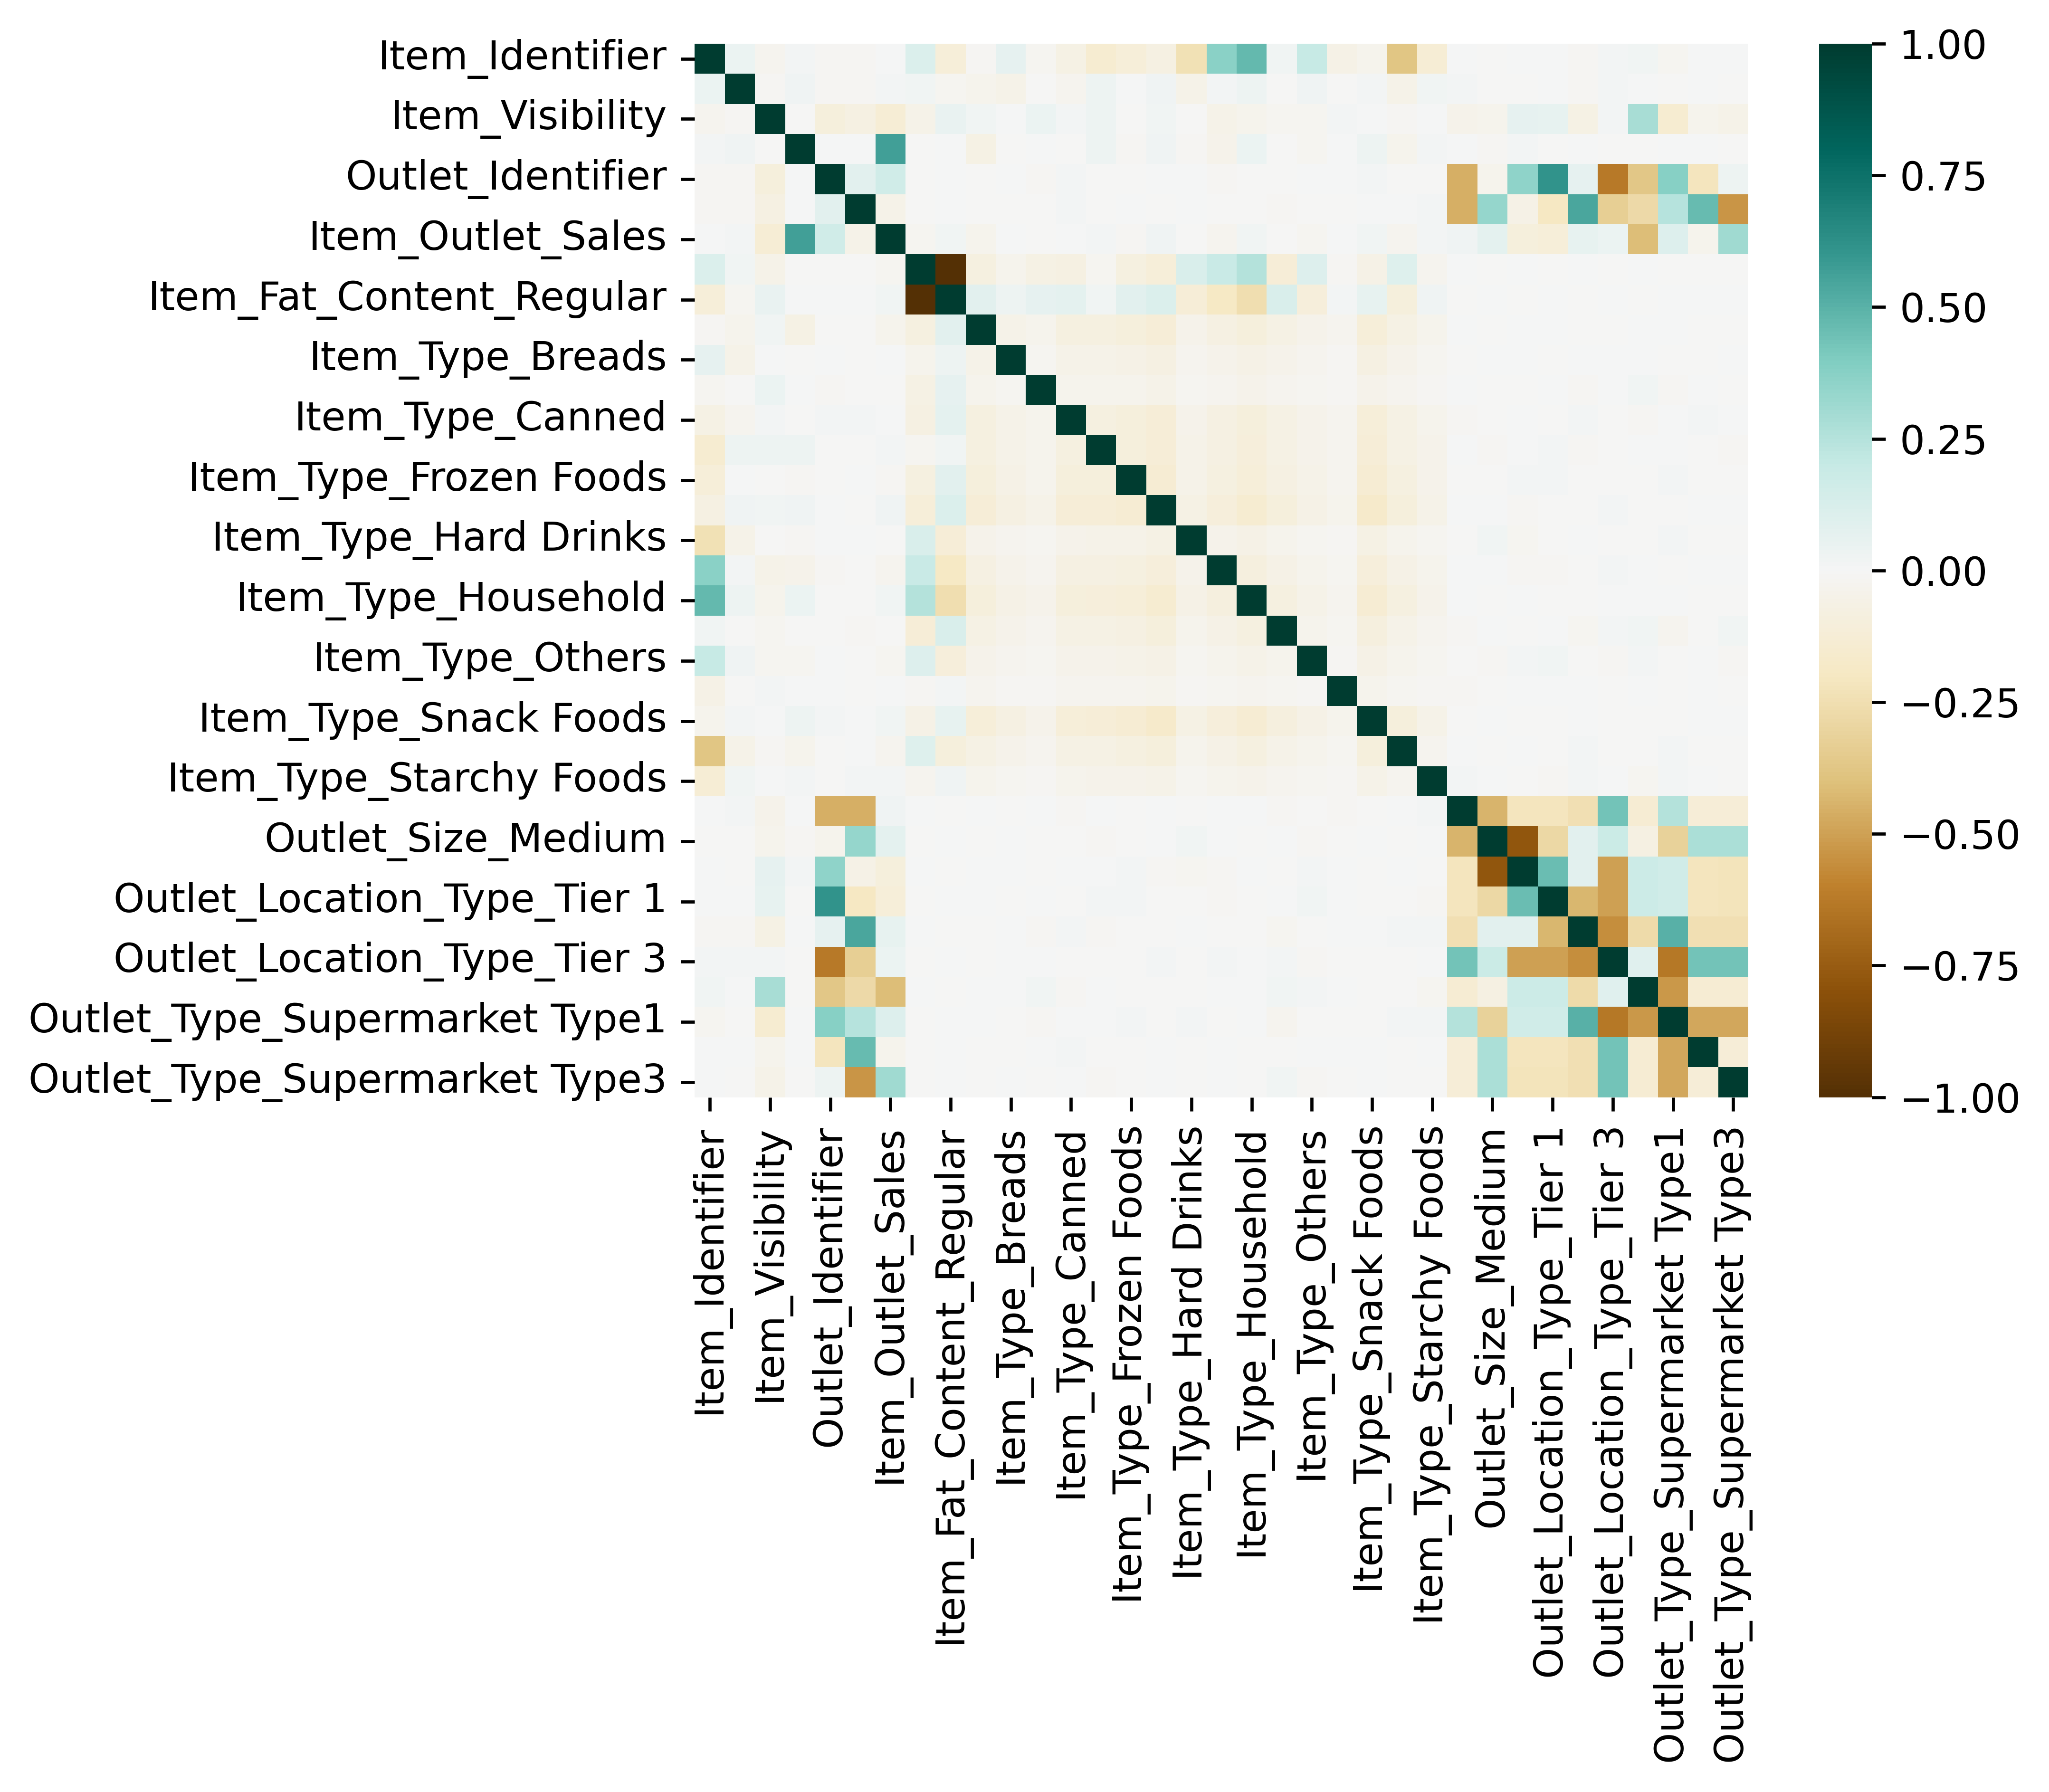

In [34]:
sns.heatmap(data.corr(), cmap="BrBG", annot = False, annot_kws={"size":16}, square = True)

#### With Train-Test data together

In [59]:
# Load train and test data
train = pd.read_csv(r"C:\Users\INBHV3\OneDrive - ABB\Desktop\Big Mart Sales Prediction\Inputs\train.csv")
test = pd.read_csv(r"C:\Users\INBHV3\OneDrive - ABB\Desktop\Big Mart Sales Prediction\Inputs\test.csv")

# Fill missing values (same as train)
for col in ['Outlet_Size']:
    mode = train[col].mode()[0]
    train[col] = train[col].fillna(mode)
    test[col] = test[col].fillna(mode)
for col in ['Item_Weight']:
    mean = train[col].mean()
    train[col] = train[col].fillna(mean)
    test[col] = test[col].fillna(mean)

In [60]:
# Standardize Item_Fat_Content
fat_map = {
    'low fat': 'Low Fat', 'LF': 'Low Fat', 'Low Fat': 'Low Fat', 'Low fat': 'Low Fat',
    'reg': 'Regular', 'Regular': 'Regular', 'regular': 'Regular'
}
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(fat_map)
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(fat_map)

In [61]:
# Label Encoding for high-cardinality columns
le_item = LabelEncoder()
le_outlet = LabelEncoder()
train['Item_Identifier'] = le_item.fit_transform(train['Item_Identifier'])
test['Item_Identifier'] = le_item.transform(test['Item_Identifier'])
train['Outlet_Identifier'] = le_outlet.fit_transform(train['Outlet_Identifier'])
test['Outlet_Identifier'] = le_outlet.transform(test['Outlet_Identifier'])

In [62]:
# One-hot encoding for low-cardinality columns
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
full = pd.concat([train[cat_cols], test[cat_cols]], axis=0)
full_encoded = pd.get_dummies(full, columns=cat_cols, dtype=int)
train_encoded = full_encoded.iloc[:len(train), :].reset_index(drop=True)
test_encoded = full_encoded.iloc[len(train):, :].reset_index(drop=True)


In [ ]:
#-----Creating interaction features-----#
train['MRP_Visibility_Interaction'] = train['Item_MRP'] * train['Item_Visibility']
test['MRP_Visibility_Interaction'] = test['Item_MRP'] * test['Item_Visibility']


In [63]:
# Merge encoded columns back
df_train = pd.concat([train.drop(cat_cols, axis=1).reset_index(drop=True), train_encoded], axis=1)
df_test = pd.concat([test.drop(cat_cols, axis=1).reset_index(drop=True), test_encoded], axis=1)

In [64]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.30,0.016047,249.8092,9,1999,3735.1380,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,8,5.92,0.019278,48.2692,3,2009,443.4228,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,662,17.50,0.016760,141.6180,9,1999,2097.2700,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,1121,19.20,0.000000,182.0950,0,1998,732.3800,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,1297,8.93,0.000000,53.8614,1,1987,994.7052,1,0,0,...,1,0,0,0,0,1,0,1,0,0


In [83]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [65]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1114,20.750000,0.007565,107.8622,9,1999,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,1078,8.300000,0.038428,87.3198,2,2007,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
2,1420,14.600000,0.099575,241.7538,0,1998,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,817,7.315000,0.015388,155.0340,2,2007,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,1197,12.857645,0.118599,234.2300,5,1985,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [66]:
df_train_infer = df_train.drop(['Item_Outlet_Sales'], axis =1)
df_train_Target = df_train[['Item_Outlet_Sales']]

In [70]:
'''....................................................
............Random Forest Model Prediction ............
.......................................................'''

from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(
    n_estimators = 200, criterion = "squared_error", max_depth=None,
    min_samples_split=2, min_samples_leaf=1, max_features = "sqrt",
    bootstrap=True ,random_state=None) #, verbose=2)

history_RF = RF_model.fit(df_train_infer, df_train_Target)


c:\Users\INBHV3\AppData\Local\anaconda3\envs\ml_base\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [69]:
prediction_RF = RF_model.predict(df_test)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


In [71]:
'''....................................................
..........Light Gradient Boosting Machine (LGBM)........
.......................................................'''

from lightgbm import LGBMRegressor

LGBMR_model = LGBMRegressor(boosting_type ='dart', 
                            learning_rate = 0.1, n_estimators = 120)

history_LGBMR = LGBMR_model.fit(df_train_infer, df_train_Target)

prediction_LGBMR = LGBMR_model.predict(df_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 8523, number of used features: 34
[LightGBM] [Info] Start training from score 2181.288915


In [77]:
#pip install xgboost
from xgboost import XGBRegressor

XGB_model = XGBRegressor(booster = 'gbtree', eta = 0.1, max_depth = 16, 
                         objective = 'reg:squarederror', #[default=reg:squarederror]
                         max_delta_step =0, subsample =0.5, 
                         n_estimators=300, learning_rate=0.05, 
                         colsample_bytree =0.7, alpha=0, gamma=0, 
                         reg_alpha=0.1, # L1 regularization
                         reg_lambda=0.4, # L2 regularization
                         tree_method = 'approx') #For large datasets, tree_method='hist' is faster.
#updater = 'prune', max_leaf_nodes =, scale_pos_weight =,  )

history_XGB = XGB_model.fit(df_train_infer, df_train_Target)

prediction_XGB = XGB_model.predict(df_test)



In [81]:
# Merge encoded columns back
df_train = pd.concat([train.drop(cat_cols, axis=1).reset_index(drop=True), train_encoded], axis=1)
df_test = pd.concat([test.drop(cat_cols, axis=1).reset_index(drop=True), test_encoded], axis=1)

df_train_infer = df_train.drop(['Item_Outlet_Sales'], axis =1)
df_train_Target = df_train[['Item_Outlet_Sales']]


<Axes: >

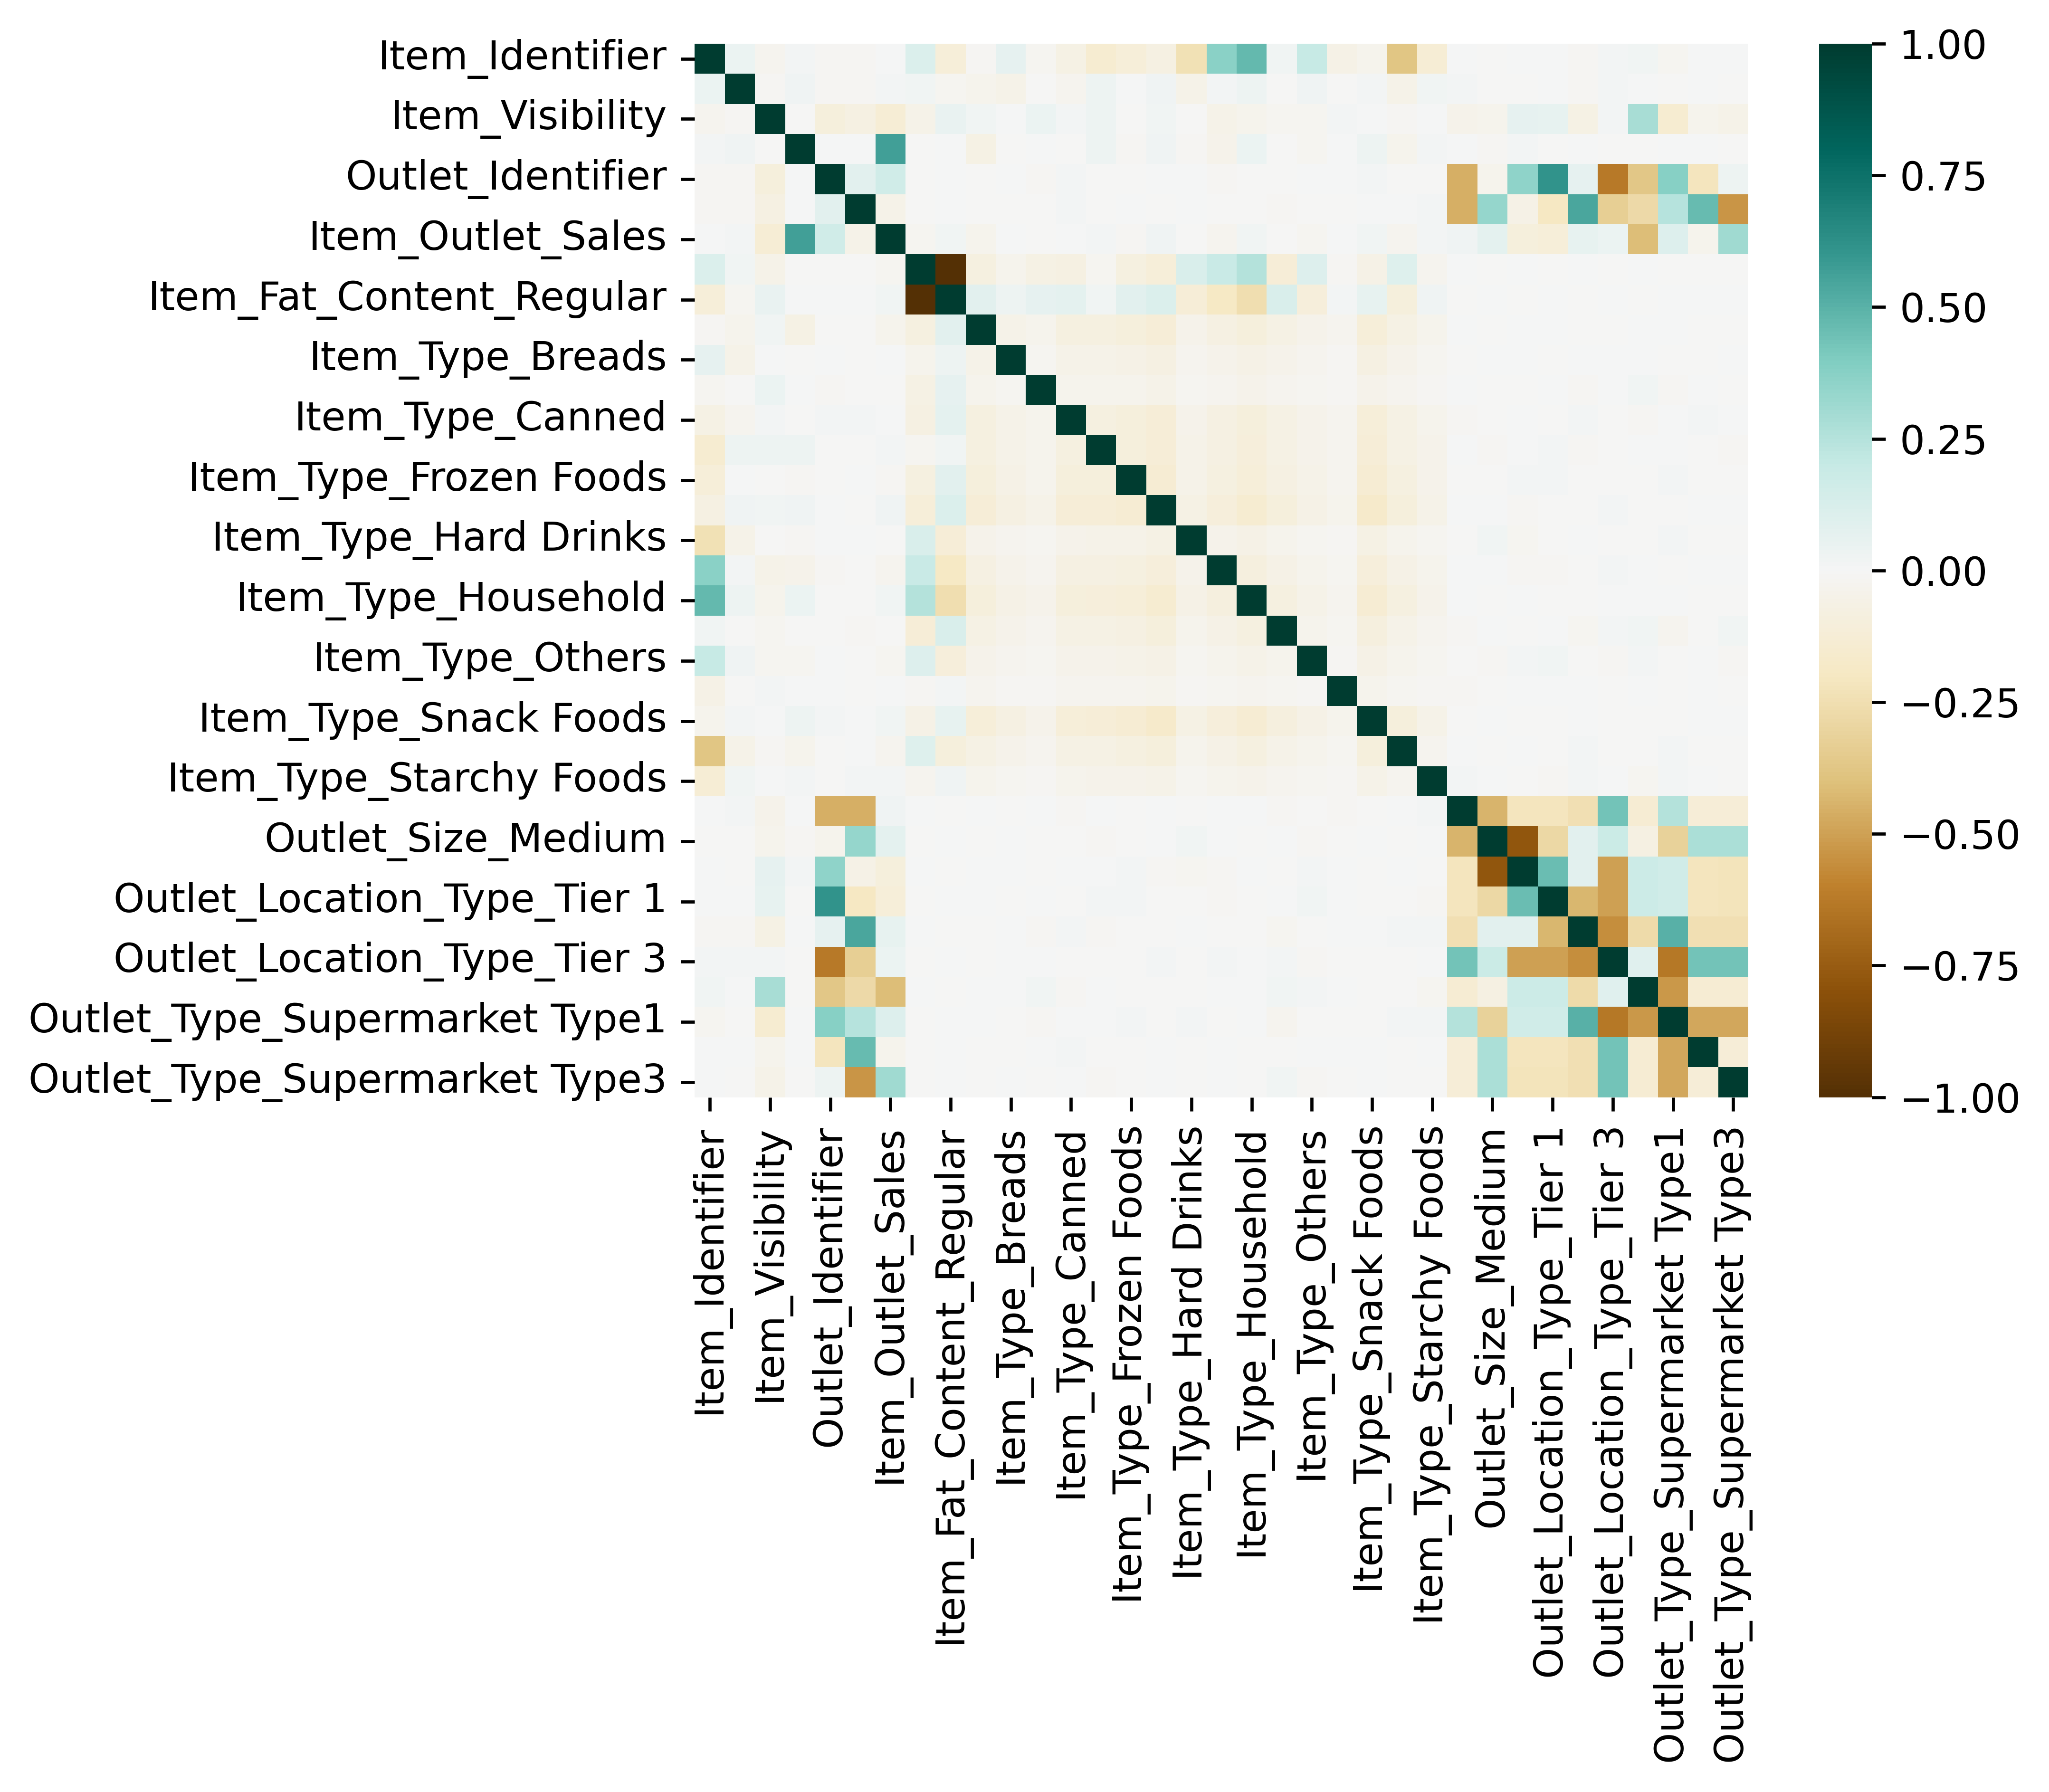

In [82]:
sns.heatmap(df_train.corr(), cmap="BrBG", annot = False, annot_kws={"size":16}, square = True)
